# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

###    Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Solution-
    Step 1- Import Libraries
    Step 2- Read Data
    Step 3- Data Cleaning
    Step 4- Train-Test Split
    Step 5- Feature Scaling
    Step 6- Build model using Regularization
        6a- Ridge Regression
            Model Evaluation
        6b- Lasso Regression
            Model Evaluation
    Step 7- Compare R2, RSS, MSE, RMSE data for Ridge and Lasso

# Step 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, scale, StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split

import warnings
warnings.filterwarnings('ignore')

#pd.set_option('display.max_columns', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)

# Step 2. Read data

In [2]:
# Import and Read Data
house = pd.read_csv("train.csv")
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [3]:
# Check for 
house.shape

(1460, 81)

In [4]:
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Drop id field from data frame
house.drop(columns=['Id'], axis=1, inplace=True)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd     

In [7]:
# Divide data into numerical and categorical data
cols = list(house.columns)
cat_col = list(house.select_dtypes(include='object').columns)
num_col = list(house.select_dtypes(include=['float64', 'int64']).columns)

print(num_col)
print(cat_col)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual

In [8]:
# Plot numerical data
fig, axs = plt.subplots(nrows=len(num_col), ncols=2, figsize=(12,160) )

for i, col in enumerate(num_col):
    sns.boxplot(x=house[col], color='lightblue', ax=axs[i][0])
    plt.title(col)
    sns.distplot(house[col], kde=False, color='lightgreen', ax=axs[i][1] )
    #plt.title(col)
plt.show()

In [9]:
# Plot Categorical data
fig, axs = plt.subplots(nrows=len(cat_col), figsize=(8,270) )

for i, col in enumerate(cat_col):
    sns.countplot(data=house, x=col, ax=axs[i], order=house[col].value_counts().index)
    #plt.title(col)
    axs[i].tick_params(axis='x', rotation=45)
plt.show()

In [10]:
# create correlation matrix
corr_mat = house.corr(numeric_only=True)
corr_mat

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  SalePrice
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   0.027850      0.040581    0.022936   -0.069836   -0.065649  -0.140759    -0.238518 -0.251758  0.307886      0.046474   0.074853      0.003491     -0.002333  0.131608  0.177354     -0.023438      0.281721      0.040380   -0.045569     0.085072   -0.040110   -0.098672   -0.012579    -0.006100      -0.012037  -0.043825    -0.026030  0.008283 -0.007683 -0.013585 -0.021407  -0.084284
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   0.123349      0.088866    0.193458    0.233633    0.049900   0.132644     0.392075  0.457181  0.080177      0.038469   0.402797      0.100949     -0.007234  0.198769  0.053532      0.263170     -0.006069      0.352096    0.266639     0.070250    0.285691    0.344997    0.088521     0.151972       0.010700   0.070029     0.041383  0.206167  0.003368  0.011200  0.007450   0.351799
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   0.014228      0.013788    0.104160    0.214103    0.111170  -0.002618     0.260833  0.299475  0.050986      0.004779   0.263116      0.158155      0.048046  0.126031  0.014259      0.119690     -0.017784      0.190015    0.271364    -0.024947    0.154871    0.180403    0.171698     0.084774      -0.018340   0.020423     0.043160  0.077672  0.038068  0.001205 -0.014261   0.263843
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   0.572323      0.550684    0.411876    0.239666   -0.059119   0.308159     0.537808  0.476224  0.295493     -0.030429   0.593007      0.111098     -0.040150  0.550600  0.273458      0.101676     -0.183882      0.427452    0.396765     0.547766    0.600671    0.562022    0.238923     0.308819      -0.113937   0.030371     0.064886  0.065166 -0.031406  0.070815 -0.027347   0.790982
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000  -0.375983      0.073741   -0.128101   -0.046231    0.040229  -0.136841    -0.171098 -0.144203  0.028942      0.025494  -0.079686     -0.054942      0.117821 -0.194149 -0.060769      0.012980     -0.087001     -0.057583   -0.023820    -0.324297   -0.185758   -0.151521   -0.003334    -0.032589       0.070356   0.025504     0.054811 -0.001985  0.068777 -0.003511  0.043950  -0.077856
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   1.000000      0.592855    0.315707    0.249503   -0.049107   0.149040     0.391452  0.281986  0.010308     -0.183784   0.199010      0.187599     -0.038162  0.468271  0.242656     -0.070651     -0.174800      0.095589    0.147716     0.825667    0.537850    0.478954    0.224880     0.188686      -0.387268   0.031355    -0.050364  0.004950 -0.034383  0.012398 -0.013618   0.522897
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   0.592855      1.000000    0.179618    0.128451   -0.067759   0.181133     0.291066  0.240379  0.140024     -0.062419   0.287389      0.119470     -0.012337  0.439046  0.183331     -0.040581     -0.149598      0.191740    0.112581     0.642277    0.420622    0.371600    0.205726     0.226298      -0.193919   0.045286    -0.038740  0.005829 -0.010286  0.021490  0.035743   0.507101
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   0.315707      0.179618    1.000000    0.264736   -0.072319   0.114442     0.363936  0.344501  0.174561     -0.069071   0.390857      0.085310      0.026673  0.276833  0.201444      0.102821     -0.037610      0.280682    0.249070     0.252691    0.364204    0.373066

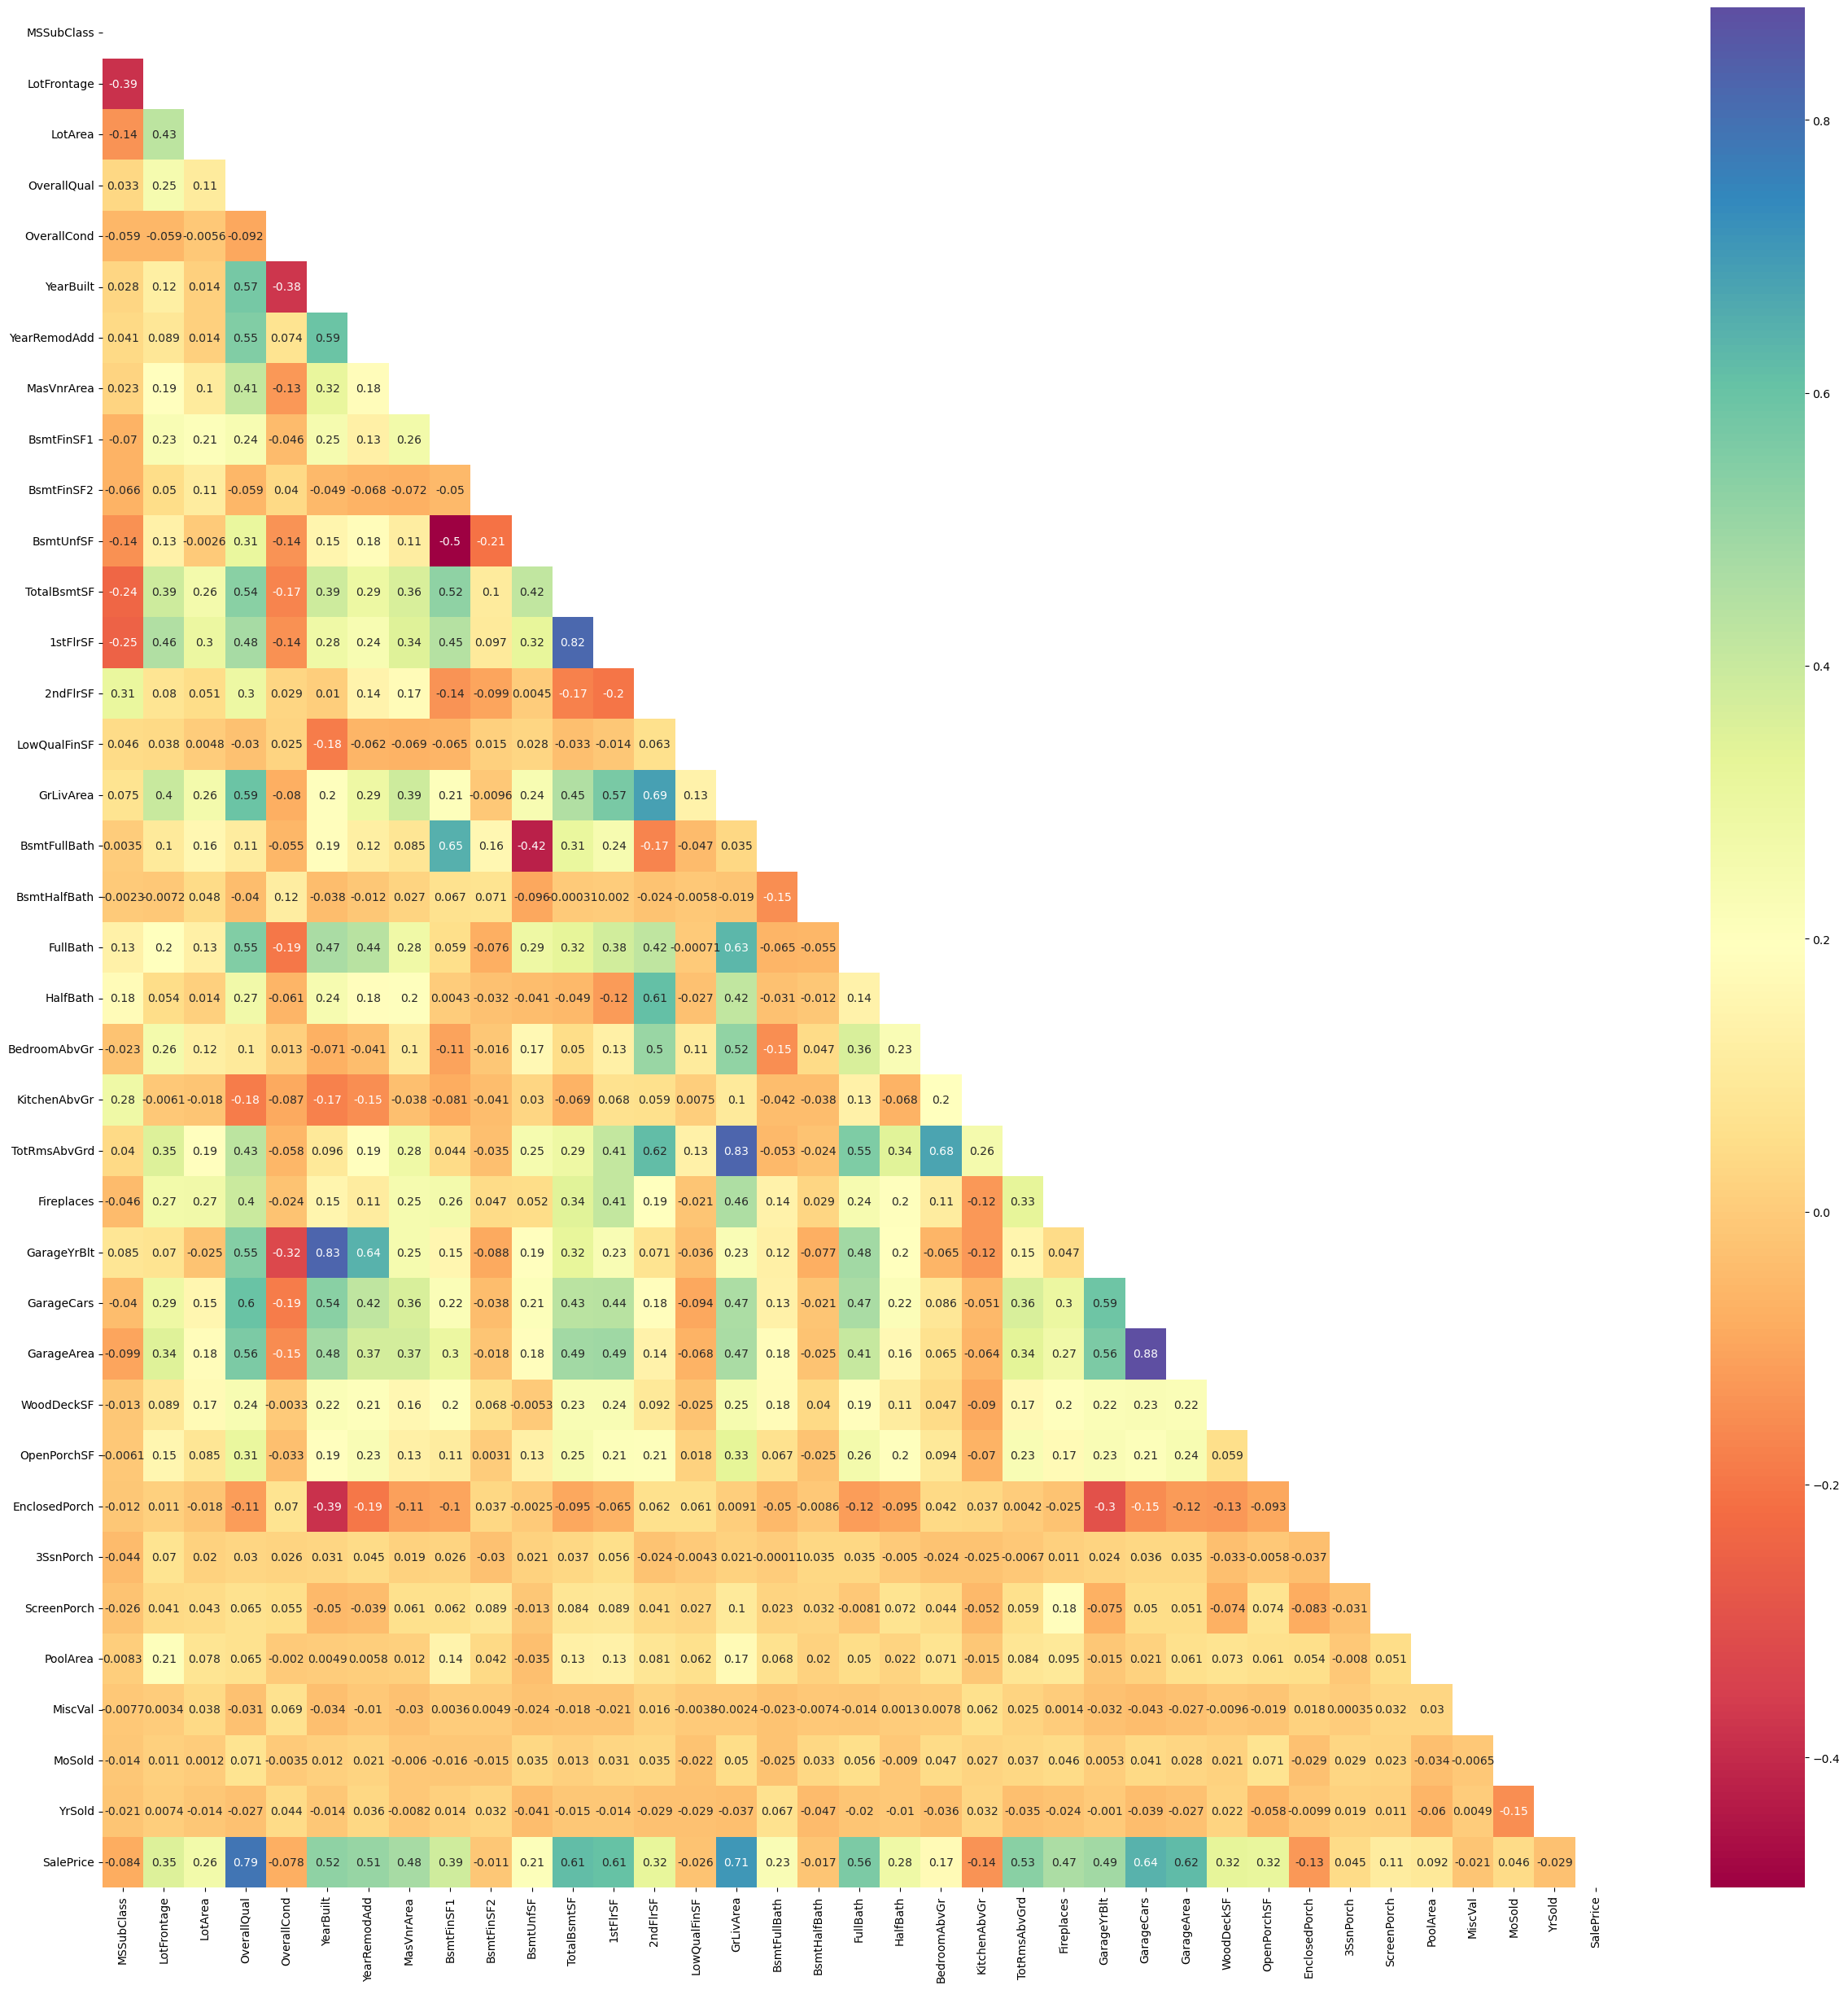

In [11]:
# Plot heat map to check correlation 
plt.figure(figsize=[30,30])
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat, cmap='Spectral', annot=True, mask=mask)
plt.show()

### Conclusion -
    1. There is strong correlation between GarageCars and GarageArea
    2. There is strong correlation between YearBuilt and GarageyrBlt
    3. There is strong correlation between GrLivArea and TotRmsAbvGr
    4. There is strong correlation between 1stFlrSF and TotalBsmtSF

In [12]:
num_col1 = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'SalePrice']
num_col2 = ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'SalePrice']
num_col3 = ['GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [13]:
# Pair plot analysis to check relation
sns.pairplot(house[num_col1], corner=True)
plt.show()

### Conclusion-
1. There is linear relationship between SalePrice and yearBuilt, YearRemodAdd

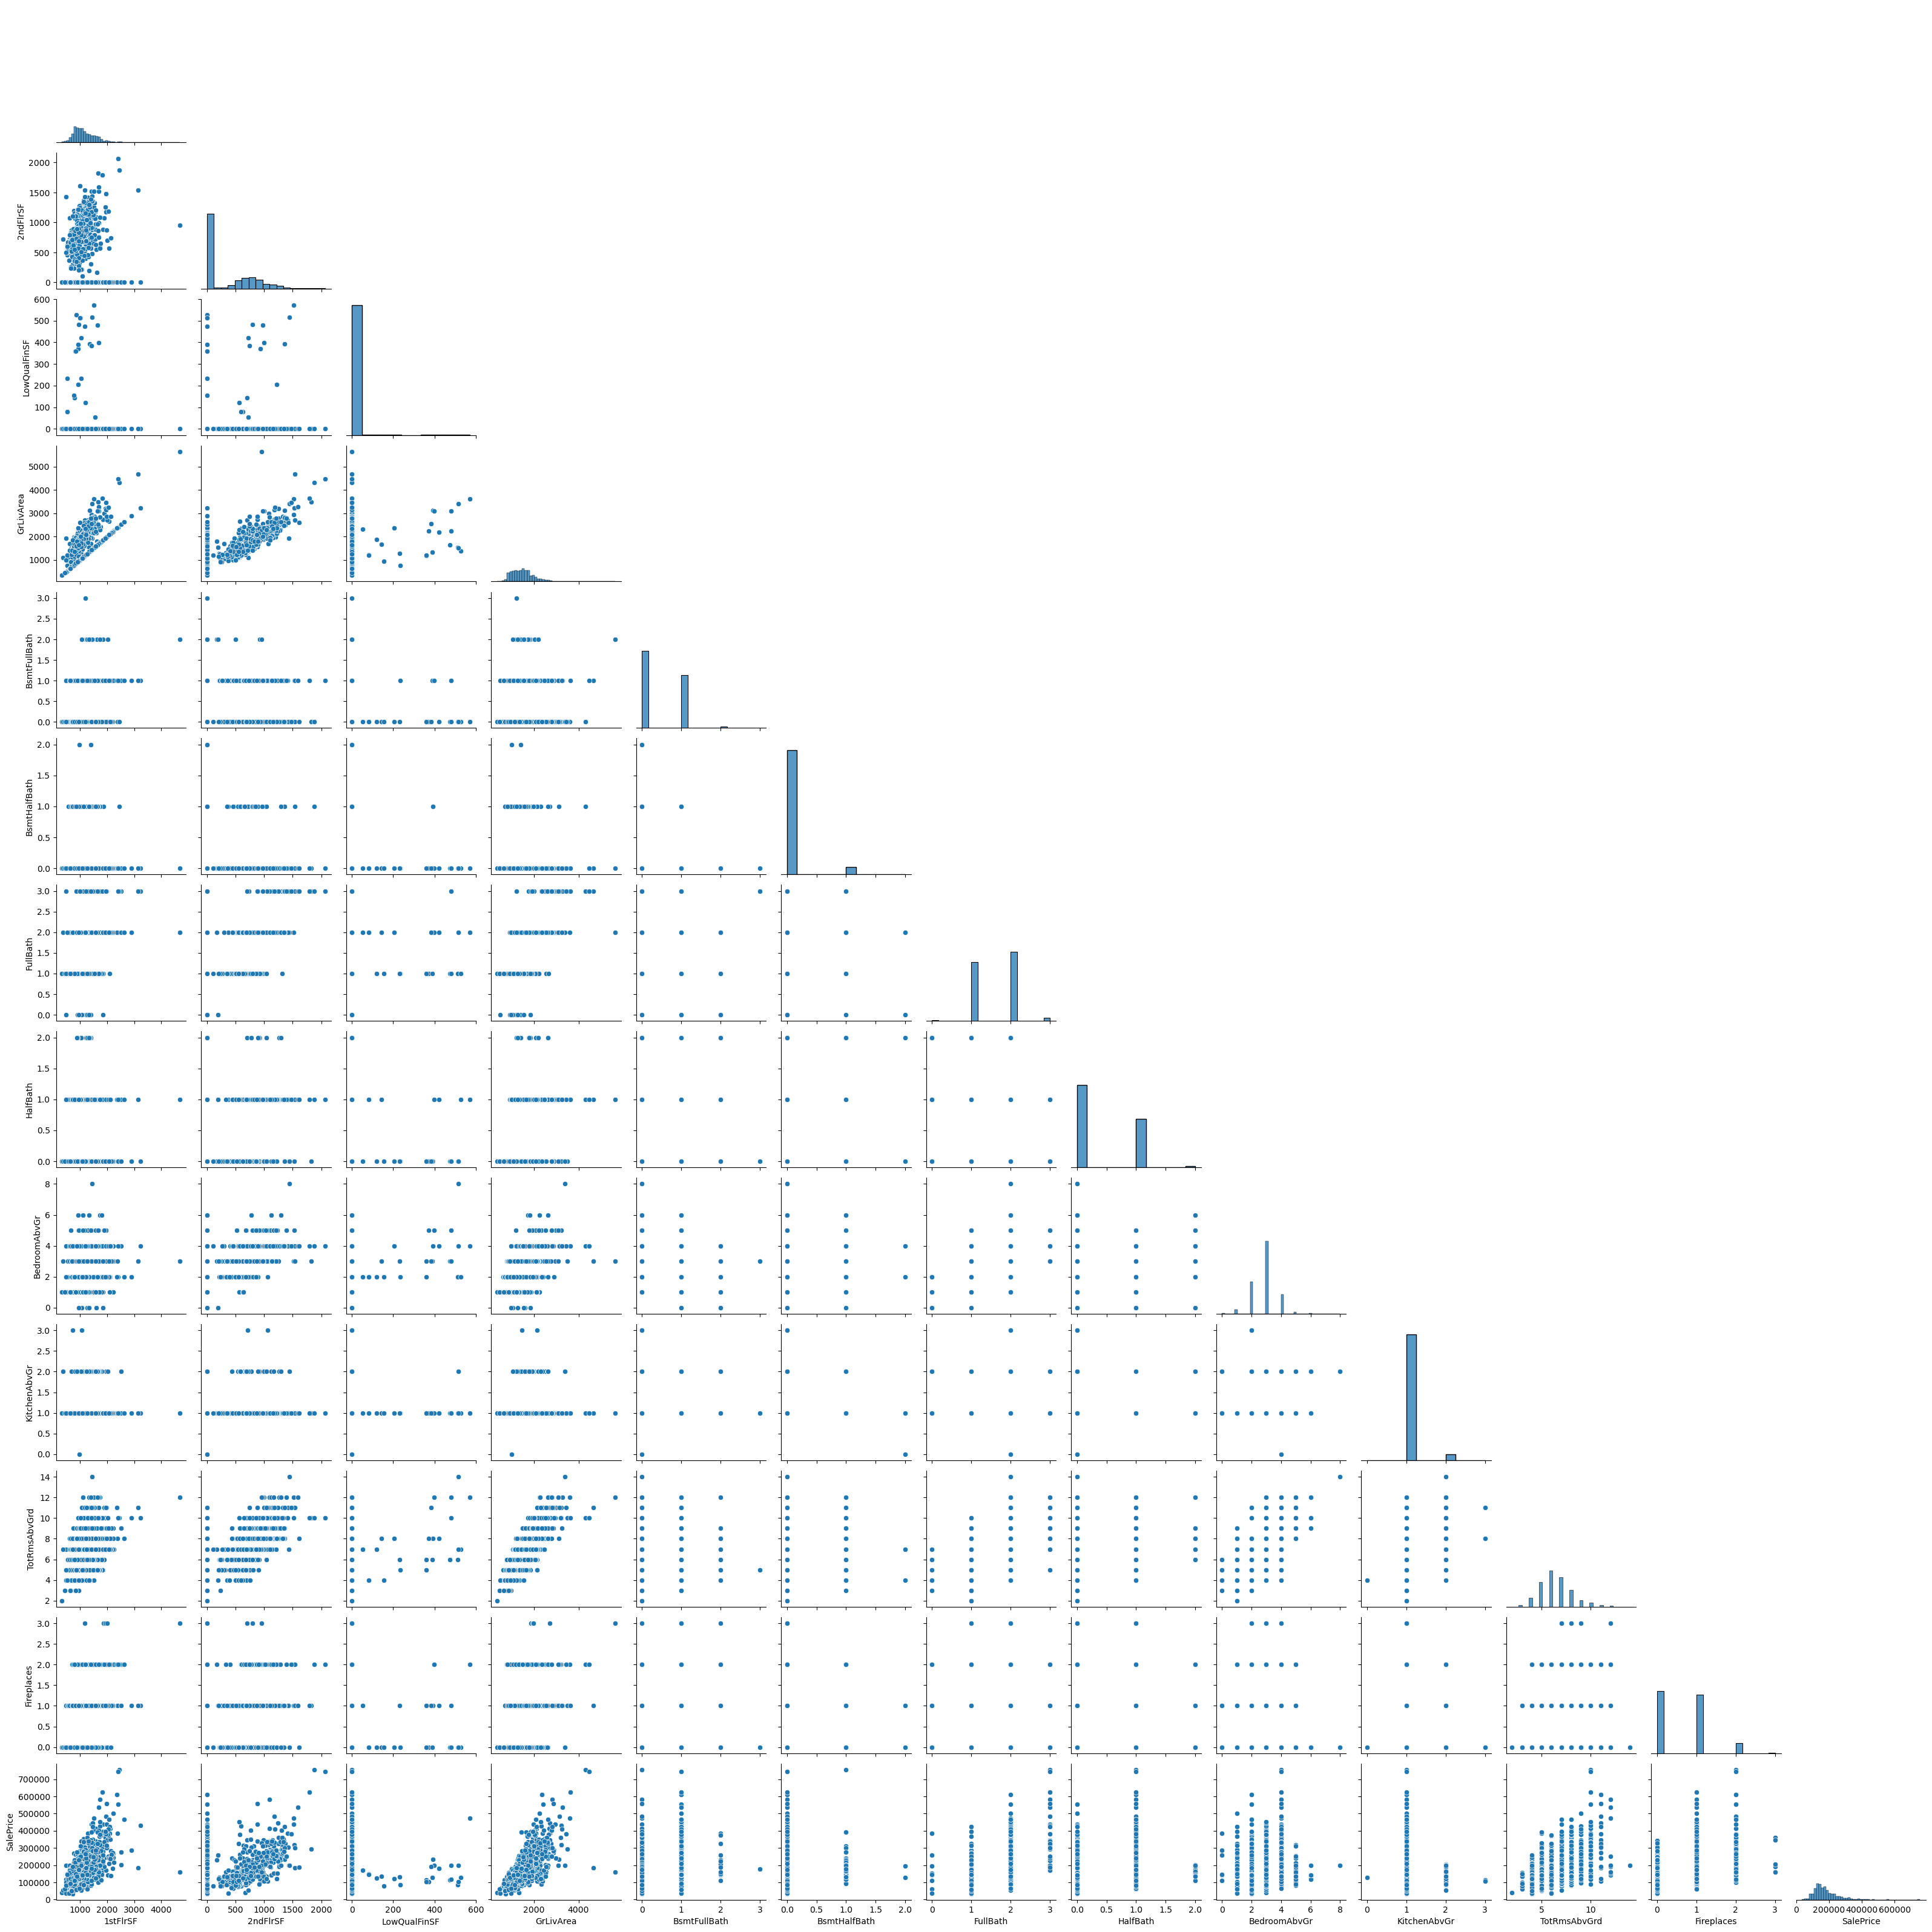

In [14]:
# Pair plot analysis to check relation
sns.pairplot(house[num_col2], corner=True)
plt.show()

### Conclusion-
1. There is linear relationship between SalePrice and 1stFlrSf, 2ndFlrSF, GrLivArea

In [15]:
# Pair plot analysis to check relation
sns.pairplot(house[num_col3], corner=True)
plt.show()

### Conclusion-
1. There is linear relationship between SalePrice and GarageAream WoodDeckSF

There are many linear Relationship, so we can use Linear Regression

In [16]:
# Drop columns where corelation is above 80%
cor_drop_col = ['GarageYrBlt', 'GarageCars', 'TotRmsAbvGrd', '1stFlrSF']
house = house.drop(columns=cor_drop_col, axis=1)

# Step 3 - Data cleaning

In [17]:
# Check the null data percentage
#round(house.isnull().sum()/len(house.index)*100,2)
round(house.isnull().mean()*100,2).sort_values(ascending=False)
#house.isnull()>0

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
MasVnrType       59.73
FireplaceQu      47.26
LotFrontage      17.74
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtCond          2.53
BsmtQual          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
Electrical        0.07
MSSubClass        0.00
KitchenQual       0.00
Functional        0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
BsmtFullBath      0.00
KitchenAbvGr      0.00
GarageArea        0.00
Fireplaces        0.00
LowQualFinSF      0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
GrLivArea         0.00
Heating    

In [18]:
house['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [19]:
# Extract column names with missing data more than 40%
cols = list(house.columns)
drop_col = []
print('\nMissing data columns list with percentage missing info:\n')
for col in cols:
    if house[col].isnull().sum()/len(house.index) >= 0.40:
        print("{0} : {1}%".format(col, round(house[col].isnull().sum()/len(house.index)*100,2)))
        drop_col.append(col)
#drop_col


Missing data columns list with percentage missing info:

Alley : 93.77%
MasVnrType : 59.73%
FireplaceQu : 47.26%
PoolQC : 99.52%
Fence : 80.75%
MiscFeature : 96.3%


In [20]:
# Drop the columns from data
house = house.drop(drop_col, axis=1)
house.shape

(1460, 70)

In [21]:
# Check the null data percentage again
round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False)

LotFrontage      17.74
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
Electrical        0.07
BsmtHalfBath      0.00
FullBath          0.00
KitchenQual       0.00
HalfBath          0.00
BedroomAbvGr      0.00
BsmtFullBath      0.00
GrLivArea         0.00
KitchenAbvGr      0.00
LowQualFinSF      0.00
MSSubClass        0.00
Functional        0.00
Fireplaces        0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
2ndFlrSF          0.00
TotalBsmtSF       0.00
CentralAir        0.00
OverallCond       0.00
LotArea           0.00
Street            0.00
LotShape   

In [22]:
# List column names with missing data 
cols = list(house.columns)
missing_data_col = []
print('\nMissing data columns list with percentage missing info:\n')
for col in cols:
    if house[col].isnull().sum()/len(house.index) > 0.0:
        print("{0} : {1}%".format(col, round(house[col].isnull().sum()/len(house.index)*100,2)))
        missing_data_col.append(col)
missing_data_col


Missing data columns list with percentage missing info:

LotFrontage : 17.74%
MasVnrArea : 0.55%
BsmtQual : 2.53%
BsmtCond : 2.53%
BsmtExposure : 2.6%
BsmtFinType1 : 2.53%
BsmtFinType2 : 2.6%
Electrical : 0.07%
GarageType : 5.55%
GarageFinish : 5.55%
GarageQual : 5.55%
GarageCond : 5.55%


['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [23]:
for miss_col in missing_data_col:
    print(house[miss_col].value_counts())

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3


In [24]:
# Since GarageYrBlt is not available, it means Garage is not build, we can infer same from other other parameters- 'GarageYrBlt',
# 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType'
# Set the the value of GarageYrBlt as zero and others as NA
#house['GarageYrBlt'] = house['GarageYrBlt'].fillna(0)
house['GarageFinish'] = house['GarageFinish'].fillna('NA')
house['GarageQual'] = house['GarageQual'].fillna('NA')
house['GarageCond'] = house['GarageCond'].fillna('NA')
house['GarageType'] = house['GarageType'].fillna('NA')

In [25]:
# For Basement related columns ('BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',) 
# Null data means Basement is not there 
# Fill above with NA
house['BsmtQual'] = house['BsmtQual'].fillna('NA')
house['BsmtCond'] = house['BsmtCond'].fillna('NA')
house['BsmtExposure'] = house['BsmtExposure'].fillna('NA')
house['BsmtFinType1'] = house['BsmtFinType1'].fillna('NA')
house['BsmtFinType2'] = house['BsmtFinType2'].fillna('NA')

In [26]:
# Fill Elctrical column with Mode value
house['Electrical'] = house['Electrical'].fillna(house['Electrical'].mode()[0])

In [27]:
# Fill the Null values of LotFrontage and MasVnrArea with median values
house['LotFrontage'] = house['LotFrontage'].fillna(house['LotFrontage'].median())
house['MasVnrArea'] = house['MasVnrArea'].fillna(house['MasVnrArea'].median())

In [28]:
# Verify if there is any missing values
100*house.isnull().mean()

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr 

In [29]:
(house['MSZoning'].value_counts()/len(house.index))[0]

0.7883561643835616

In [30]:
# Check object data type and check the percentage of data in that
col_high_bias_list = []
for obj_col in list(house.select_dtypes(include=['object'])):
    print(round(house[obj_col].value_counts()/len(house.index)*100,2))
    print('\n')
    if ((house[obj_col].value_counts()/len(house.index))[0]>= 0.8):
        col_high_bias_list.append(obj_col)
    else:
        print('=====')
print(col_high_bias_list)    

MSZoning
RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68
Name: count, dtype: float64


=====
Street
Pave    99.59
Grvl     0.41
Name: count, dtype: float64


LotShape
Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68
Name: count, dtype: float64


=====
LandContour
Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: count, dtype: float64


Utilities
AllPub    99.93
NoSeWa     0.07
Name: count, dtype: float64


LotConfig
Inside     72.05
Corner     18.01
CulDSac     6.44
FR2         3.22
FR3         0.27
Name: count, dtype: float64


=====
LandSlope
Gtl    94.66
Mod     4.45
Sev     0.89
Name: count, dtype: float64


Neighborhood
NAmes      15.41
CollgCr    10.27
OldTown     7.74
Edwards     6.85
Somerst     5.89
Gilbert     5.41
NridgHt     5.27
Sawyer      5.07
NWAmes      5.00
SawyerW     4.04
BrkSide     3.97
Crawfor     3.49
Mitchel     3.36
NoRidge     2.81
Timber      2.60
IDOTRR      2.53
ClearCr     1.92
StoneBr     1.71
SWISU       1

In [31]:
# Drop the columns which has more than 80% data of same type
house = house.drop(col_high_bias_list, axis=1)
house.shape

(1460, 50)

In [32]:
house.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd  MasVnrArea ExterQual Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  Fireplaces GarageType GarageFinish  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
0          60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5       2003          2003     Gable     VinylSd     VinylSd       196.0        Gd      PConc       Gd           No          GLQ         706           0        150          856        Ex       854             0       1710             1             0         2         1             3             1          Gd           0     Attchd          RFn         548           0           61              0          0            0         0        0       2    2008     208500
1          20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8       1976          1976     Gable     MetalSd     MetalSd         0.0        TA     CBlock       Gd           Gd          ALQ         978           0        284         1262        Ex         0             0       1262             0             1         2         0             3             1          TA           1     Attchd          RFn         460         298            0              0          0            0         0        0       5    2007     181500
2          60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5       2001          2002     Gable     VinylSd     VinylSd       162.0        Gd      PConc       Gd           Mn          GLQ         486           0        434          920        Ex       866             0       1786             1             0         2         1             3             1          Gd           1     Attchd          RFn         608           0           42              0          0            0         0        0       9    2008     223500
3          70       RL         60.0     9550      IR1    Corner      Crawfor     2Story            7            5       1915          1970     Gable     Wd Sdng     Wd Shng         0.0        TA     BrkTil       TA           No          ALQ         216           0        540          756        Gd       756             0       1717             1             0         1         0             3             1          Gd           1     Detchd          Unf         642           0           35            272          0            0         0        0       2    2006     140000
4          60       RL         84.0    14260      IR1       FR2      NoRidge     2Story            8            5       2000          2000     Gable     VinylSd     VinylSd       350.0        Gd      PConc       Gd           Av          GLQ         655           0        490         1145        Ex      1053             0       2198             1             0         2         1             4             1          Gd           1     Attchd          RFn         836         192           84              0          0            0         0        0      12    2008     250000

In [33]:
house.select_dtypes('object').columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish'], dtype='object')

In [34]:
print(house['LotFrontage'].median())
print(house['LotFrontage'].mean())
print(house['MasVnrArea'].median())
print(house['MasVnrArea'].mean())

69.0
69.86369863013698
0.0
103.11712328767123


In [35]:
#house['Electrical'].mode()[0]
house.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd  MasVnrArea ExterQual Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  Fireplaces GarageType GarageFinish  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
0          60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5       2003          2003     Gable     VinylSd     VinylSd       196.0        Gd      PConc       Gd           No          GLQ         706           0        150          856        Ex       854             0       1710             1             0         2         1             3             1          Gd           0     Attchd          RFn         548           0           61              0          0            0         0        0       2    2008     208500
1          20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8       1976          1976     Gable     MetalSd     MetalSd         0.0        TA     CBlock       Gd           Gd          ALQ         978           0        284         1262        Ex         0             0       1262             0             1         2         0             3             1          TA           1     Attchd          RFn         460         298            0              0          0            0         0        0       5    2007     181500
2          60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5       2001          2002     Gable     VinylSd     VinylSd       162.0        Gd      PConc       Gd           Mn          GLQ         486           0        434          920        Ex       866             0       1786             1             0         2         1             3             1          Gd           1     Attchd          RFn         608           0           42              0          0            0         0        0       9    2008     223500
3          70       RL         60.0     9550      IR1    Corner      Crawfor     2Story            7            5       1915          1970     Gable     Wd Sdng     Wd Shng         0.0        TA     BrkTil       TA           No          ALQ         216           0        540          756        Gd       756             0       1717             1             0         1         0             3             1          Gd           1     Detchd          Unf         642           0           35            272          0            0         0        0       2    2006     140000
4          60       RL         84.0    14260      IR1       FR2      NoRidge     2Story            8            5       2000          2000     Gable     VinylSd     VinylSd       350.0        Gd      PConc       Gd           Av          GLQ         655           0        490         1145        Ex      1053             0       2198             1             0         2         1             4             1          Gd           1     Attchd          RFn         836         192           84              0          0            0         0        0      12    2008     250000

In [36]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearBuilt      1460 non-null   int64  
 11  YearRemodAdd   1460 non-null   int64  
 12  RoofStyle      1460 non-null   object 
 13  Exterior1st    1460 non-null   object 
 14  Exterior2nd    1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   object 
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [37]:
house.select_dtypes(include='object').columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish'], dtype='object')

In [38]:
# Encode the categorical variables
label_encoder = LabelEncoder()

for cat_col in list(house.select_dtypes(include=['object'])):
    house[cat_col] = label_encoder.fit_transform(house[cat_col])

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   int32  
 5   LotConfig      1460 non-null   int32  
 6   Neighborhood   1460 non-null   int32  
 7   HouseStyle     1460 non-null   int32  
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearBuilt      1460 non-null   int64  
 11  YearRemodAdd   1460 non-null   int64  
 12  RoofStyle      1460 non-null   int32  
 13  Exterior1st    1460 non-null   int32  
 14  Exterior2nd    1460 non-null   int32  
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int32  
 17  Foundation     1460 non-null   int32  
 18  BsmtQual

In [39]:
# Check for categorical column
list(house.select_dtypes(include=['object']))

[]

In [40]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 
data = {'fruit': ['apple', 'orange', 'banana', 'apple', 'banana', 'orange'], 'quantity': [5, 3, 2, 7, 4, 6]} 
df = pd.DataFrame(data) 
encoder = LabelEncoder() 
df['fruit_encoded'] = encoder.fit_transform(df['fruit']) 
df.head()

fruit  quantity  fruit_encoded
0   apple         5              0
1  orange         3              2
2  banana         2              1
3   apple         7              0
4  banana         4              1

# Step 4- Train test split

In [41]:
# Split data into training and test set
df_train , df_test = train_test_split(house, train_size=0.7, random_state=100)

In [42]:
print(df_train.shape)
print(df_test.shape)

(1021, 50)
(439, 50)


# Step 5- Feature scaling

In [43]:
cols_scale = list(house.columns)
#list(house.columns)
len(cols_scale)

50

In [44]:
# Instantiate MinMaxScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()

# fit the data
df_train[cols_scale] = scaler.fit_transform(df_train[cols_scale])
df_test[cols_scale] = scaler.transform(df_test[cols_scale])

In [45]:
df_test.describe()

MSSubClass    MSZoning  LotFrontage     LotArea    LotShape   LotConfig  Neighborhood  HouseStyle  OverallQual  OverallCond   YearBuilt  YearRemodAdd   RoofStyle  Exterior1st  Exterior2nd  MasVnrArea   ExterQual  Foundation    BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF   HeatingQC    2ndFlrSF  LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  Fireplaces  GarageType  GarageFinish  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch    PoolArea     MiscVal      MoSold      YrSold   SalePrice
count  439.000000  439.000000   439.000000  439.000000  439.000000  439.000000    439.000000  439.000000   439.000000    439.00000  439.000000    439.000000  439.000000   439.000000   439.000000  439.000000  439.000000  439.000000  439.000000    439.000000    439.000000  439.000000  439.000000  439.000000   439.000000  439.000000  439.000000    439.000000  439.000000    439.000000    439.000000  439.000000  439.000000    439.000000    439.000000   439.000000  439.000000  439.000000    439.000000  439.000000  439.000000   439.000000     439.000000  439.000000   439.000000  439.000000  439.000000  439.000000  439.000000  439.000000
mean     0.195498    0.756834     0.169688    0.042580    0.642369    0.780752      0.508732    0.435405     0.568211      0.57033    0.718431      0.576500    0.290205     0.692971     0.691420    0.062453    0.845103    0.273804    0.684510      0.764806      0.543280    0.076739    0.025998    0.246305     0.171326    0.405467    0.171923      0.010651    0.205844      0.130600      0.026196    0.520121    0.198178      0.361333      0.014806     0.776765    0.215642    0.403569      0.626424    0.335170    0.114320     0.087549       0.034346    0.004282     0.046575    0.006444    0.002022    0.490785    0.452164    0.203785
std      0.233458    0.157423     0.074967    0.042978    0.473999    0.387327      0.254733    0.267174     0.149440      0.14508    0.217104      0.346002    0.170065     0.233033     0.242272    0.102809    0.234733    0.148114    0.316696      0.380845      0.383116    0.077027    0.092564    0.182297     0.063409    0.433215    0.212739      0.096367    0.098175      0.167510      0.116540    0.183095    0.254002      0.100787      0.097383     0.284518    0.213849    0.321028      0.390333    0.153518    0.148636     0.127082       0.101487    0.040640     0.174747    0.078665    0.013016    0.236138    0.325813    0.111541
min      0.000000    0.000000     0.000000   -0.000828    0.000000    0.000000      0.000000    0.000000     0.000000      0.12500    0.021739      0.000000    0.000000     0.000000     0.000000    0.000000    0.000000    0.000000    0.000000      0.000000      0.000000    0.000000    0.000000    0.000000     0.000000    0.000000    0.000000      0.000000   -0.019985      0.000000      0.000000    0.000000    0.000000      0.000000     -0.500000     0.000000    0.000000    0.000000      0.000000    0.000000    0.000000     0.000000       0.000000    0.000000     0.000000    0.000000    0.000000    0.000000    0.000000    0.004166
25%      0.000000    0.750000     0.133562    0.029293    0.000000    0.500000      0.291667    0.285714     0.444444      0.50000    0.594203      0.266667    0.200000     0.428571     0.533333    0.000000    0.666667    0.200000    0.500000      0.500000      0.333333    0.000000    0.000000    0.109161     0.133061    0.000000    0.000000      0.000000    0.131245      0.000000      0.000000    0.333333    0.000000      0.250000      0.000000     0.666667    0.000000    0.166667      0.333333    0.236953    0.000000     0.000000       0.000000    0.000000     0.000000    0.000000    0.000000    0.363636    0.250000    0.134842
50%      0.176471    0.750000     0.164384    0.036947    1.000000    1.000000      0.500000    0.285714     0.555556      0.50000    0.724638      0.716667    0.200000     0.8571

### Split data into X_train, y_train, X_test, y_test

In [46]:
# Split the data into X_train, y_train, X_test and y_test
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [47]:
y_test.head()

1436    0.118872
57      0.224413
780     0.195945
382     0.248021
1170    0.189002
Name: SalePrice, dtype: float64

# Step 6:- Build model using Regularization

## 6a. Ridge Regression

In [48]:
# Define Lambda values (alpha)
params = {'alpha':[0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 
                   0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]}

# Instantiate ridge
ridge = Ridge()

# Define 5 Folds
folds = 5

# fit the model and cross validation using GridSearchCV
model_cv_ridge = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=folds,
                             verbose=1, return_train_score=True)
model_cv_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3,
                                   4, 5, 6, 7, 8, 9, 10, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
model_cv_ridge.best_params_['alpha']

1.0

In [50]:
pd.DataFrame(model_cv_ridge.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0        0.016952      0.012068         0.005001        0.001697      0.0001  {'alpha': 0.0001}          -0.028470          -0.032718          -0.030418          -0.026797          -0.029288        -0.029538        0.001980               18           -0.028444           -0.024026           -0.026988           -0.028055           -0.027387         -0.026980         0.001561
1        0.010891      0.000284         0.005779        0.001414       0.001   {'alpha': 0.001}          -0.028470          -0.032719          -0.030416          -0.026796          -0.029287        -0.029538        0.001980               17           -0.028444           -0.024027           -0.026988           -0.028055           -0.027387         -0.026980         0.001561
2        0.008423      0.001104         0.004813        0.001720       0.005   {'alpha': 0.005}          -0.028470          -0.032723          -0.030406          -0.026795          -0.029284        -0.029535        0.001981               16           -0.028443           -0.024030           -0.026987           -0.028055           -0.027386         -0.026980         0.001559
3        0.009694      0.002446         0.005025        0.001111        0.01    {'alpha': 0.01}          -0.028469          -0.032728          -0.030393          -0.026794          -0.029279        -0.029532        0.001982               15           -0.028441           -0.024035           -0.026985           -0.028054           -0.027386         -0.026980         0.001557
4        0.009830      0.002694         0.006824        0.002240        0.05    {'alpha': 0.05}          -0.028460          -0.032767          -0.030297          -0.026783          -0.029247        -0.029511        0.001992               13           -0.028430           -0.024074           -0.026978           -0.028053           -0.027388         -0.026985         0.001540
5        0.010825      0.001670         0.005010        0.001599         0.1     {'alpha': 0.1}          -0.028447          -0.032810          -0.030201          -0.026769          -0.029215        -0.029488        0.002004               12           -0.028421           -0.024123           -0.026974           -0.028057           -0.027392         -0.026993         0.001521
6        0.011337      0.002319         0.005448        0.001131         0.2     {'alpha': 0.2}          -0.028416          -0.032880          -0.030051          -0.026756          -0.029169        -0.029454        0.002026               11           -0.028412           -0.024213           -0.026975           -0.028076           -0.027419         -0.027019         0.001490
7        0.012380      0.001577         0.007435        0.000924         0.3     {'alpha': 0.3}          -0.028380          -0.032937          -0.029929          -0.026762          -0.029145        -0.029431        0.002042                9           -0.028417           -0.024294           -0.026997           -0.028102           -0.027451         -0.027052         0.001465
8        0.010093      0.002584         0.006164        0.001406         0.4     {'alpha': 0.4}          -0.028345          -0.032984          -0.029825          -0.026770          -0.029131        -0.029411        0.002055                8           -0.028430           -0.024372           -0.027030           -0.028134           -0.027478         -0.027089         0.001444
9        0.010034      0.003398         0.005832        0.001144         0.5     {'alpha': 0.5}          -0.028307          -0.033023          -0.029738          -0.026776          -0.029138        -0.029396        0.002068                7    

In [51]:
# Define function for coefficients R_Squared, RSS, MSE, RMSE
def regresison_metrcis(y_train, y_train_pred, y_test, y_test_pred):
    metrics = []
    # R-squared value training data
    r2_train = r2_score(y_train, y_train_pred)
    print("r2_train: {0}".format(r2_train))
    metrics.append(r2_train)
    
    # RSS for training data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    print("rss_train: " + str(rss_train))
    metrics.append(rss_train)
    
    # MSE for train 
    mse_train = mean_squared_error(y_train, y_train_pred)
    print('mse_train :'+ str(mse_train))
    metrics.append(mse_train)
    
    # RMSE for training data
    rmse_train = mse_train**0.5
    print('rmse_train: '+ str(rmse_train))
    metrics.append(rmse_train)
    
    # R-squared value test data
    r2_test = r2_score(y_test, y_test_pred)
    print('r2_test: '+ str(r2_test))
    metrics.append(r2_test)
    
    # RSS for test data
    rss_test = np.sum(np.square(y_test - y_test_pred))
    print('rss_test: '+str(rss_test))
    metrics.append(rss_test)
    
    # MSE for test data 
    mse_test = mean_squared_error(y_test, y_test_pred)
    print('mse_test: '+ str(mse_test))
    metrics.append(mse_test)
    
    # RMSE for test data
    rmse_test = mse_test**0.5
    print('rmse_test: '+str(rmse_test))
    metrics.append(rmse_test)
    
    return metrics

In [52]:
# Use best params for creaing model
alpha = model_cv_ridge.best_params_['alpha']

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.04997079 -0.00405368 -0.0257775   0.07695153 -0.00228556 -0.00019464
  0.01726614 -0.01952005  0.16161444  0.04460423  0.01365758  0.00777672
  0.01485004  0.00189741 -0.01617796  0.06456515 -0.02740694  0.01773841
 -0.03363239 -0.02293098 -0.01428728  0.04713851  0.01226564  0.02726629
  0.0569269  -0.0029958   0.05655872 -0.01696662  0.19210738  0.04767049
  0.01038752  0.02800813  0.00626333  0.00523996 -0.0115038  -0.03993855
  0.035628   -0.00342636 -0.01132433  0.06228288  0.02047362 -0.01606199
 -0.00446269  0.02145319  0.01269197 -0.03469243 -0.01761239 -0.00347834
 -0.01012436]


In [53]:
y_train.head()

318     0.312595
239     0.108457
986     0.114012
1416    0.121650
390     0.116789
Name: SalePrice, dtype: float64

In [54]:
# Get the predicted values for test and train data
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Get the R2, RSS, MSE and RMSE for train and test data
ridge_metrics = regresison_metrcis(y_train, y_train_pred, y_test, y_test_pred)
ridge_metrics

r2_train: 0.8291244466793088
rss_train: 2.103010043837184
mse_train :0.0020597551849531673
rmse_train: 0.04538452583153389
r2_test: 0.8337533155035062
rss_test: 0.9059355171322371
mse_test: 0.00206363443538095
rmse_test: 0.04542724331698931


[0.8291244466793088,
 2.103010043837184,
 0.0020597551849531673,
 0.04538452583153389,
 0.8337533155035062,
 0.9059355171322371,
 0.00206363443538095,
 0.04542724331698931]

### Model Evaluation: Residual Analysis

In [55]:
# Calculate the residual value
res = y_test - y_test_pred

In [56]:
# Plot the y_test and y_pred data
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.xlabel('y_pred')
plt.show()

In [57]:
sns.scatterplot(res)
plt.axhline(y=0, color='red')
plt.show()

### Conclusion - 
1. Residuals are evenly distributed and Horizontal axis and there is no relation

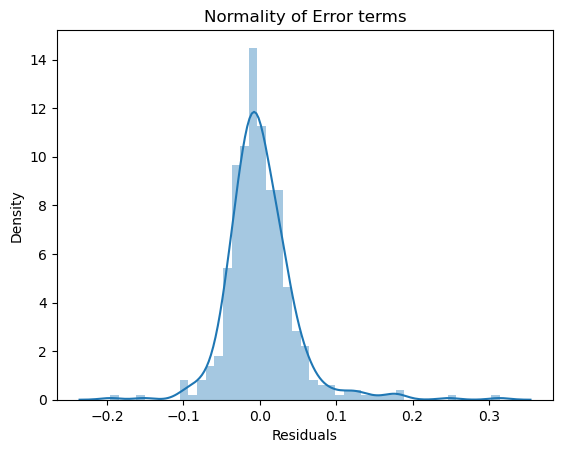

In [58]:
# Distribution plot for error
sns.distplot(res)
plt.title('Normality of Error terms')
plt.xlabel('Residuals')
plt.show()

### Conclusion - 
1. Errors are centred around Zero

### 6b. Lasso Regression

In [59]:
# Create model using Lasso regression
lasso = Lasso()

# Perform cross validation
model_cv_lasso = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_absolute_error', cv=folds,
                             verbose=1, return_train_score=True)
model_cv_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3,
                                   4, 5, 6, 7, 8, 9, 10, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
model_cv_lasso.best_params_

{'alpha': 0.0001}

In [61]:
pd.DataFrame(model_cv_lasso.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0        0.014069      0.002262         0.006303        0.001024      0.0001  {'alpha': 0.0001}          -0.027269          -0.032077          -0.029643          -0.026546          -0.029421        -0.028991        0.001953                1           -0.028199           -0.024060           -0.026797           -0.028048           -0.027546         -0.026930         0.001516
1        0.012458      0.001680         0.006754        0.001574       0.001   {'alpha': 0.001}          -0.027673          -0.034221          -0.030527          -0.028854          -0.031808        -0.030617        0.002289                2           -0.030530           -0.027933           -0.029257           -0.030732           -0.030137         -0.029718         0.001026
2        0.011926      0.002541         0.006751        0.001114       0.005   {'alpha': 0.005}          -0.042569          -0.050404          -0.043523          -0.043304          -0.047209        -0.045402        0.002975                3           -0.044975           -0.043299           -0.044059           -0.044699           -0.044445         -0.044295         0.000582
3        0.011746      0.001879         0.005948        0.001423        0.01    {'alpha': 0.01}          -0.058733          -0.064353          -0.057112          -0.055597          -0.063226        -0.059804        0.003421                4           -0.059402           -0.058578           -0.059341           -0.058104           -0.059179         -0.058921         0.000502
4        0.012922      0.001256         0.005326        0.001262        0.05    {'alpha': 0.05}          -0.080067          -0.083171          -0.077650          -0.075051          -0.084132        -0.080014        0.003381                5           -0.080533           -0.078553           -0.080507           -0.080814           -0.079252         -0.079932         0.000876
5        0.009367      0.003252         0.005702        0.002046         0.1     {'alpha': 0.1}          -0.080067          -0.083171          -0.077650          -0.075051          -0.084132        -0.080014        0.003381                5           -0.080533           -0.078553           -0.080507           -0.080814           -0.079252         -0.079932         0.000876
6        0.010799      0.002401         0.005900        0.001927         0.2     {'alpha': 0.2}          -0.080067          -0.083171          -0.077650          -0.075051          -0.084132        -0.080014        0.003381                5           -0.080533           -0.078553           -0.080507           -0.080814           -0.079252         -0.079932         0.000876
7        0.009577      0.001513         0.005890        0.001791         0.3     {'alpha': 0.3}          -0.080067          -0.083171          -0.077650          -0.075051          -0.084132        -0.080014        0.003381                5           -0.080533           -0.078553           -0.080507           -0.080814           -0.079252         -0.079932         0.000876
8        0.011838      0.001603         0.005414        0.001755         0.4     {'alpha': 0.4}          -0.080067          -0.083171          -0.077650          -0.075051          -0.084132        -0.080014        0.003381                5           -0.080533           -0.078553           -0.080507           -0.080814           -0.079252         -0.079932         0.000876
9        0.008193      0.002628         0.004292        0.001640         0.5     {'alpha': 0.5}          -0.080067          -0.083171          -0.077650          -0.075051          -0.084132        -0.080014        0.003381                5    

In [62]:
# Create model using bets alpha values

alpha = model_cv_lasso.best_params_['alpha']
#alpha = 0.01
lasso = Lasso(alpha=alpha)

# fit the model
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [63]:
# Check the coeffcients
lasso.coef_

array([-0.04737465, -0.        , -0.00553483,  0.06224243, -0.00227218,
        0.        ,  0.01504167, -0.01629694,  0.17938218,  0.03821185,
        0.02362041,  0.0077801 ,  0.00685074, -0.        , -0.01311895,
        0.06161498, -0.02639385,  0.00528315, -0.03337994, -0.02095046,
       -0.01477634,  0.        ,  0.        ,  0.00584773,  0.02224209,
       -0.00404459,  0.01683043, -0.01784427,  0.30164869,  0.04471476,
        0.00449053,  0.01361463,  0.00358113, -0.        , -0.01015819,
       -0.03726109,  0.0291902 , -0.00258433, -0.01056917,  0.05503068,
        0.01805946, -0.00754197, -0.        ,  0.        ,  0.00897975,
       -0.01763843, -0.        , -0.00096509, -0.0081992 ])

In [64]:
# Calculte y_pred for train ans test data
y_train_pred_l = lasso.predict(X_train)
y_test_pred_l = lasso.predict(X_test)

In [65]:
# Check R2, RSS, MSE and RMSE for train and test
lasso_metrics = regresison_metrcis(y_train, y_train_pred_l, y_test, y_test_pred_l)

r2_train: 0.8285062085012226
rss_train: 2.110618862493408
mse_train :0.002067207504890703
rmse_train: 0.04546655369489426
r2_test: 0.8369922430840852
rss_test: 0.8882854837402774
mse_test: 0.002023429347927739
rmse_test: 0.04498254492497883


### Model Evaluation: Residual analysis

In [66]:
# Calculate Residual Values
res_l = y_test - y_test_pred_l

In [67]:
# Plot y_test and _y_pred values
plt.scatter(y_test, y_test_pred_l)
plt.xlabel('y_test')
plt.xlabel('y_pred')
plt.show()

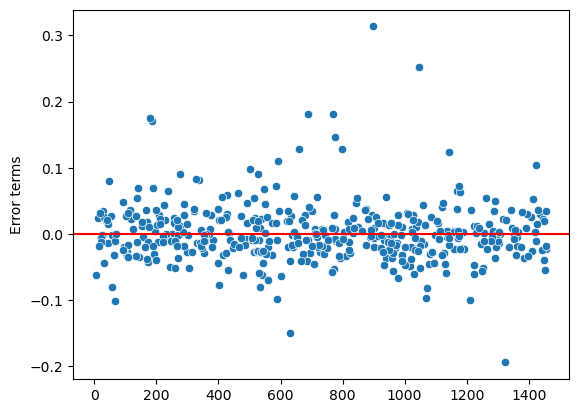

In [69]:
# Scatter plot for residual data
sns.scatterplot(res_l)
plt.axhline(y=0, color='red')
plt.ylabel('Error terms')
plt.show()

### Conclusion - 
1. Residuals are evenly distributed and Horizontal axis and there is no relation

In [70]:
# Check distribution plot for residual values
sns.distplot(res_l)
plt.title('Normality of Error terms')
plt.xlabel('Residuals')
plt.show()

### Conclusion - 
1. Errors are centred around Zero

# Step 7-  Compare R2, RSS, MSE, RMSE data for Ridge and Lasso

In [71]:
# Create table for comparision
comp_frame = {"Metric":["R2 (Train)", "RSS (Train)", "MSE (Train)", "RMSE (Train)",
                        "R2 (Test)", "RSS (Test)", "MSE (Test)", "RMSE (Test)" ]}
comparision = pd.DataFrame(comp_frame, columns=['Metric'])
ridge_data = pd.Series(ridge_metrics, name='Ridge Regression')
lasso_data = pd.Series(lasso_metrics, name='Lasso Regression')
comparision = pd.concat([comparision, ridge_data, lasso_data], axis=1)
comparision

Metric  Ridge Regression  Lasso Regression
0    R2 (Train)          0.829124          0.828506
1   RSS (Train)          2.103010          2.110619
2   MSE (Train)          0.002060          0.002067
3  RMSE (Train)          0.045385          0.045467
4     R2 (Test)          0.833753          0.836992
5    RSS (Test)          0.905936          0.888285
6    MSE (Test)          0.002064          0.002023
7   RMSE (Test)          0.045427          0.044983

## Conclusion-
    For both Ridge and Lasos Regression Train and test Accuracy is around 83%
    - This means there is no overfitting and Underfitting of the data

In [72]:
# Create Emplty table for coeffcients
coef_table = pd.DataFrame(index=X_train.columns)
coef_table.rows = X_train.columns
coef_table.index.name = "Features"
coef_table

Empty DataFrame
Columns: []
Index: [MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LotConfig, Neighborhood, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, Foundation, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, Fireplaces, GarageType, GarageFinish, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold]

In [73]:
# Merge coefficinet data to the table
coef_table['Ridge Coefficients'] = ridge.coef_
coef_table['Lasso Coefficients'] = lasso.coef_
coef_table

Ridge Coefficients  Lasso Coefficients
Features                                             
MSSubClass              -0.049971           -0.047375
MSZoning                -0.004054           -0.000000
LotFrontage             -0.025778           -0.005535
LotArea                  0.076952            0.062242
LotShape                -0.002286           -0.002272
LotConfig               -0.000195            0.000000
Neighborhood             0.017266            0.015042
HouseStyle              -0.019520           -0.016297
OverallQual              0.161614            0.179382
OverallCond              0.044604            0.038212
YearBuilt                0.013658            0.023620
YearRemodAdd             0.007777            0.007780
RoofStyle                0.014850            0.006851
Exterior1st              0.001897           -0.000000
Exterior2nd             -0.016178           -0.013119
MasVnrArea               0.064565            0.061615
ExterQual               -0.027407           -0.026394
Foundation               0.017738            0.005283
BsmtQual                -0.033632           -0.033380
BsmtExposure            -0.022931           -0.020950
BsmtFinType1            -0.014287           -0.014776
BsmtFinSF1               0.047139            0.000000
BsmtFinSF2               0.012266            0.000000
BsmtUnfSF                0.027266            0.005848
TotalBsmtSF              0.056927            0.022242
HeatingQC               -0.002996           -0.004045
2ndFlrSF                 0.056559            0.016830
LowQualFinSF            -0.016967           -0.017844
GrLivArea                0.192107            0.301649
BsmtFullBath             0.047670            0.044715
BsmtHalfBath             0.010388            0.004491
FullBath                 0.028008            0.013615
HalfBath                 0.006263            0.003581
BedroomAbvGr             0.005240           -0.000000
KitchenAbvGr            -0.011504           -0.010158
KitchenQual             -0.039939           -0.037261
Fireplaces               0.035628            0.029190
GarageType              -0.003426           -0.002584
GarageFinish            -0.011324           -0.010569
GarageArea               0.062283            0.055031
WoodDeckSF               0.020474            0.018059
OpenPorchSF             -0.016062           -0.007542
EnclosedPorch           -0.004463           -0.000000
3SsnPorch                0.021453            0.000000
ScreenPorch              0.012692            0.008980
PoolArea                -0.034692           -0.017638
MiscVal                 -0.017612           -0.000000
MoSold                  -0.003478           -0.000965
YrSold                  -0.010124           -0.008199

In [74]:
# Top 10 features based on Lasso
coef_table.sort_values(by="Lasso Coefficients", ascending=False).head(10)

Ridge Coefficients  Lasso Coefficients
Features                                            
GrLivArea               0.192107            0.301649
OverallQual             0.161614            0.179382
LotArea                 0.076952            0.062242
MasVnrArea              0.064565            0.061615
GarageArea              0.062283            0.055031
BsmtFullBath            0.047670            0.044715
OverallCond             0.044604            0.038212
Fireplaces              0.035628            0.029190
YearBuilt               0.013658            0.023620
TotalBsmtSF             0.056927            0.022242

In [75]:
# Top 10 features based on Ridge
coef_table.sort_values(by='Ridge Coefficients', ascending=False).head(10)

Ridge Coefficients  Lasso Coefficients
Features                                            
GrLivArea               0.192107            0.301649
OverallQual             0.161614            0.179382
LotArea                 0.076952            0.062242
MasVnrArea              0.064565            0.061615
GarageArea              0.062283            0.055031
TotalBsmtSF             0.056927            0.022242
2ndFlrSF                0.056559            0.016830
BsmtFullBath            0.047670            0.044715
BsmtFinSF1              0.047139            0.000000
OverallCond             0.044604            0.038212

In [76]:
#Check the Variables which is set to zero for Lasso
coef_table[coef_table['Lasso Coefficients'] == 0]

Ridge Coefficients  Lasso Coefficients
Features                                             
MSZoning                -0.004054                -0.0
LotConfig               -0.000195                 0.0
Exterior1st              0.001897                -0.0
BsmtFinSF1               0.047139                 0.0
BsmtFinSF2               0.012266                 0.0
BedroomAbvGr             0.005240                -0.0
EnclosedPorch           -0.004463                -0.0
3SsnPorch                0.021453                 0.0
MiscVal                 -0.017612                -0.0

# Subjective Questions

### Question 1- What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

In [77]:
model_cv_ridge.best_params_['alpha']

1.0

In [78]:
model_cv_lasso.best_params_['alpha']

0.0001

In [79]:
# Double the value for alpha 
new_ridge_alpha = model_cv_ridge.best_params_['alpha']*2
new_lasso_alpha = model_cv_lasso.best_params_['alpha']*2
print(new_ridge_alpha)
print(new_lasso_alpha)

2.0
0.0002


In [80]:
# Create model with new Alpha for Ridge
ridge_new = Ridge(alpha=new_ridge_alpha)
ridge_new.fit(X_train, y_train)

Ridge(alpha=2.0)

In [81]:
# Predict y value for test and train
y_train_pred_new = ridge_new.predict(X_train)
y_test_pred_new = ridge_new.predict(X_test)
regresison_metrcis(y_train, y_train_pred_new, y_test, y_test_pred_new)

r2_train: 0.8269366839305887
rss_train: 2.129935411127475
mse_train :0.002086126749390279
rmse_train: 0.045674136547835024
r2_test: 0.831357810428561
rss_test: 0.9189894504208083
mse_test: 0.0020933700465166475
rmse_test: 0.04575336104065632


[0.8269366839305887,
 2.129935411127475,
 0.002086126749390279,
 0.045674136547835024,
 0.831357810428561,
 0.9189894504208083,
 0.0020933700465166475,
 0.04575336104065632]

In [82]:
#lasso_new = Lasso(alpha=new_lasso_alpha)
lasso_new = Lasso(alpha=0.0002)
lasso_new.fit(X_train, y_train)
y_train_pred_new_l = lasso_new.predict(X_train)
y_test_pred_new_l = lasso_new.predict(X_test)
regresison_metrcis(y_train, y_train_pred_new_l, y_test, y_test_pred_new_l)

r2_train: 0.8247496671674243
rss_train: 2.1568515973787834
mse_train :0.002112489321624665
rmse_train: 0.045961824611569384
r2_test: 0.8333913236254147
rss_test: 0.9079081357156977
mse_test: 0.0020681278717897445
rmse_test: 0.04547667393059594


[0.8247496671674243,
 2.1568515973787834,
 0.002112489321624665,
 0.045961824611569384,
 0.8333913236254147,
 0.9079081357156977,
 0.0020681278717897445,
 0.04547667393059594]

In [83]:
coef_table_new = pd.DataFrame(index=X_train.columns)
coef_table_new.rows = X_train.columns
coef_table_new.index.name = "Features"
coef_table_new['Ridge Coefficients'] = ridge.coef_
coef_table_new['Lasso Coefficients'] = lasso.coef_

In [84]:
# Top 5 features based on Lasso
coef_table.sort_values(by="Lasso Coefficients", ascending=False).head(5)

Ridge Coefficients  Lasso Coefficients
Features                                           
GrLivArea              0.192107            0.301649
OverallQual            0.161614            0.179382
LotArea                0.076952            0.062242
MasVnrArea             0.064565            0.061615
GarageArea             0.062283            0.055031

In [85]:
# Top 5 features based on Ridge
coef_table.sort_values(by="Ridge Coefficients", ascending=False).head(5)

Ridge Coefficients  Lasso Coefficients
Features                                           
GrLivArea              0.192107            0.301649
OverallQual            0.161614            0.179382
LotArea                0.076952            0.062242
MasVnrArea             0.064565            0.061615
GarageArea             0.062283            0.055031

 ### Question 3 - After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [86]:
drop_imp_feature = ['GrLivArea' ,'OverallQual', 'LotArea', 'MasVnrArea','GarageArea']
X_train_new = X_train.drop(columns=drop_imp_feature, axis=1)
X_test_new = X_test.drop(columns=drop_imp_feature, axis=1)

In [87]:
print(X_train_new.shape)
print(X_test_new.shape)

(1021, 44)
(439, 44)


In [88]:
# Create model using Lasso regression
lasso = Lasso()

# Perform cross validation
model_cv_lasso_new = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_absolute_error', cv=folds,
                             verbose=1, return_train_score=True)
model_cv_lasso_new.fit(X_train_new, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3,
                                   4, 5, 6, 7, 8, 9, 10, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
model_cv_lasso_new.best_params_['alpha']

0.0001

In [90]:
lasso_new = Lasso(alpha=model_cv_lasso_new.best_params_['alpha'])
lasso_new.fit(X_train_new, y_train)

Lasso(alpha=0.0001)

In [91]:
# Calculte y_pred for train ans test data
y_train_pred_l_new = lasso_new.predict(X_train_new)
y_test_pred_l_new = lasso_new.predict(X_test_new)

# Check R2, RSS, MSE and RMSE for train and test
lasso_metrics_new = regresison_metrcis(y_train, y_train_pred_l_new, y_test, y_test_pred_l_new)

r2_train: 0.7851333987700582
rss_train: 2.6444193548487576
mse_train :0.002590028751076158
rmse_train: 0.05089232507044808
r2_test: 0.7951390122995652
rss_test: 1.116358172162696
mse_test: 0.0025429571119879183
rmse_test: 0.05042774149203907


In [92]:
coef_table_new1 = pd.DataFrame(index=X_train_new.columns)
coef_table_new1.rows = X_train_new.columns
coef_table_new1.index.name = "Features"
coef_table_new1['Lasso Coefficients'] = lasso_new.coef_

In [93]:
coef_table_new1.sort_values(by='Lasso Coefficients', ascending=False)

Lasso Coefficients
Features                         
TotalBsmtSF              0.371003
2ndFlrSF                 0.152353
Fireplaces               0.067197
FullBath                 0.057780
OverallCond              0.057096
BsmtFullBath             0.036420
YearBuilt                0.036030
RoofStyle                0.033079
Neighborhood             0.028729
WoodDeckSF               0.026452
Foundation               0.018517
ScreenPorch              0.012295
YearRemodAdd             0.011507
3SsnPorch                0.011176
HalfBath                 0.004987
BsmtHalfBath             0.001538
BsmtFinSF1               0.000278
BsmtUnfSF                0.000000
LowQualFinSF            -0.000000
MSZoning                 0.000000
BedroomAbvGr             0.000000
EnclosedPorch            0.000000
MiscVal                 -0.000000
MoSold                  -0.000000
LotFrontage             -0.000000
LotConfig               -0.000794
BsmtFinSF2              -0.001509
LotShape                -0.001733
Exterior1st             -0.002000
HeatingQC               -0.002723
GarageFinish            -0.004884
KitchenAbvGr            -0.006607
OpenPorchSF             -0.006945
Exterior2nd             -0.008232
BsmtFinType1            -0.008844
YrSold                  -0.009563
PoolArea                -0.012093
HouseStyle              -0.014770
GarageType              -0.016750
BsmtExposure            -0.028756
ExterQual               -0.046935
BsmtQual                -0.048429
MSSubClass              -0.051846
KitchenQual             -0.055503